# Baseline Models
Initial models with cross-validation.

In [1]:
import sys
sys.path.append(r'C:\Users\ahmed\Downloads\TitanicSurvivalPrediction')
import pandas as pd
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from src.data_preprocessing import fit_transform

df = pd.read_csv('../data/raw/train.csv')
X, y, preprocessor, feature_names = fit_transform(df)

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state=0),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=0)
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=['accuracy','precision','recall','f1'])
    metrics = {m: scores[f'test_{m}'].mean() for m in ['accuracy','precision','recall','f1']}
    print(name, metrics)


LogisticRegression {'accuracy': 0.8181595631159375, 'precision': 0.7790458869087902, 'recall': 0.7339727195225916, 'f1': 0.7557319004968664}
DecisionTree {'accuracy': 0.7990647165902957, 'precision': 0.7347921254782837, 'recall': 0.7486359761295822, 'f1': 0.7409005935414805}
RandomForest {'accuracy': 0.8159123721047015, 'precision': 0.7836619941395422, 'recall': 0.7194373401534526, 'f1': 0.7495962095242406}


LogisticRegression {'accuracy': 0.8181595631159375, 'precision': 0.7790458869087902, 'recall': 0.7339727195225916, 'f1': 0.7557319004968664}
DecisionTree {'accuracy': 0.7990647165902957, 'precision': 0.7347921254782837, 'recall': 0.7486359761295822, 'f1': 0.7409005935414805}
RandomForest {'accuracy': 0.8159123721047015, 'precision': 0.7836619941395422, 'recall': 0.7194373401534526, 'f1': 0.7495962095242406}


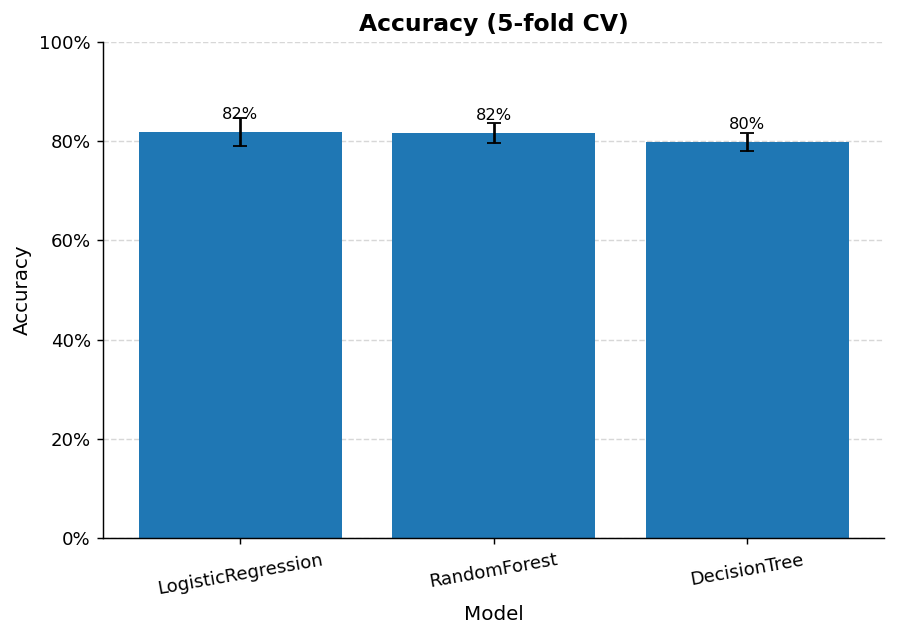

Saved: reports/cv_accuracy.png


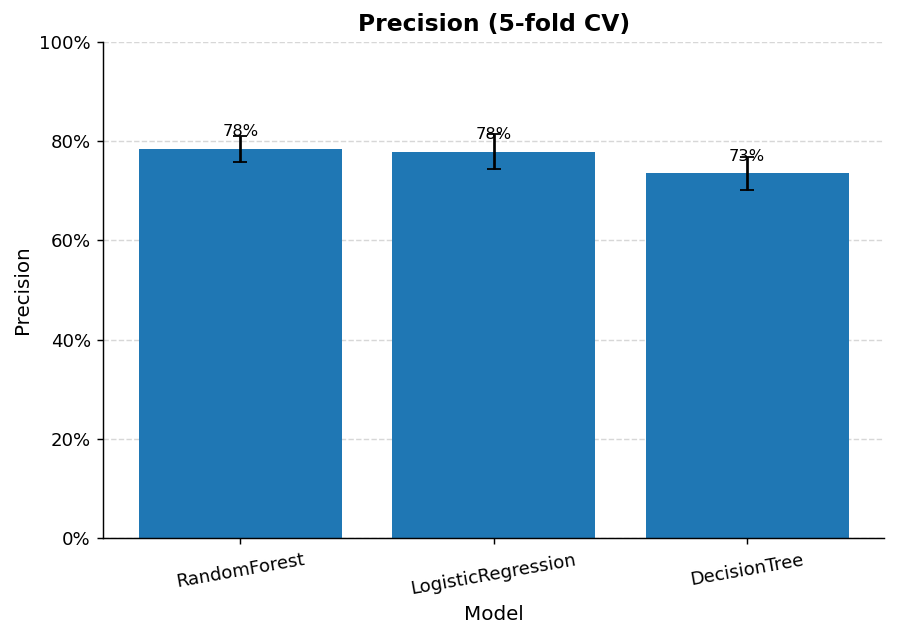

Saved: reports/cv_precision.png


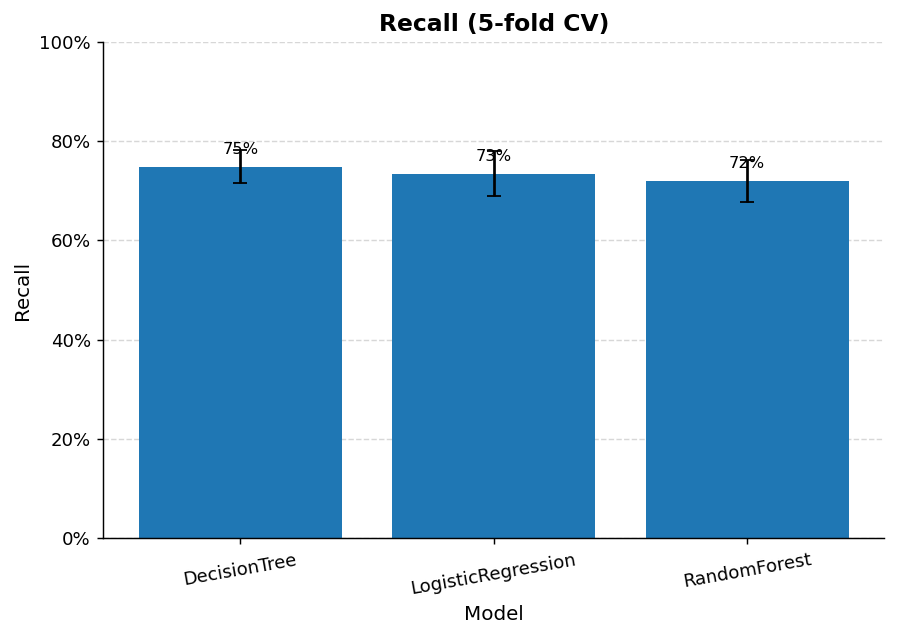

Saved: reports/cv_recall.png


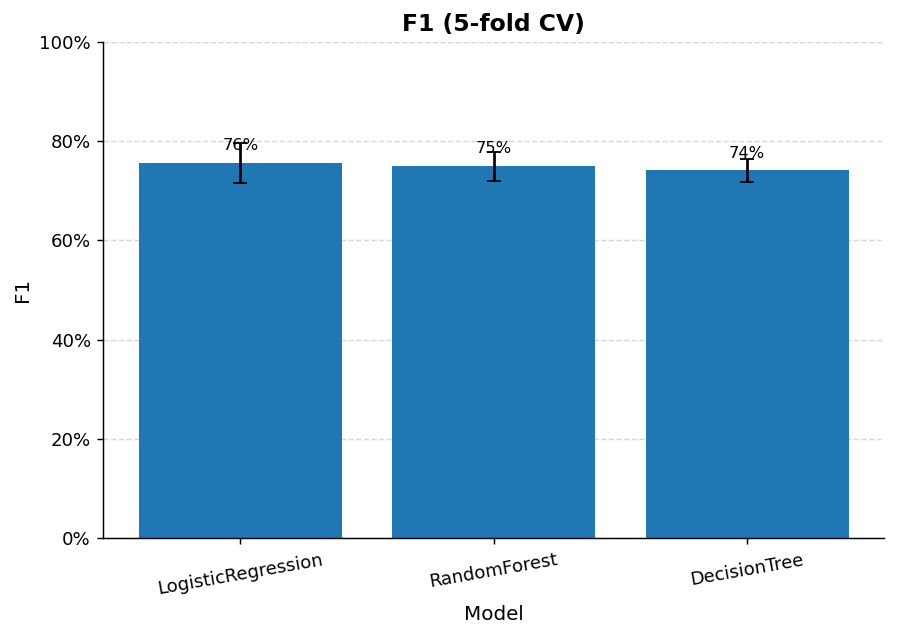

Saved: reports/cv_f1.png

**Cross-validated metrics (5-fold)**
| Model              |   Accuracy |    F1 |   Precision |   Recall |   Overall |
|:-------------------|-----------:|------:|------------:|---------:|----------:|
| LogisticRegression |      0.818 | 0.756 |       0.779 |    0.734 |     0.787 |
| DecisionTree       |      0.799 | 0.741 |       0.735 |    0.749 |     0.77  |
| RandomForest       |      0.816 | 0.75  |       0.784 |    0.719 |     0.783 |

Embed the charts in Markdown:
![Accuracy](reports/cv_accuracy.png)
![Precision](reports/cv_precision.png)
![Recall](reports/cv_recall.png)
![F1](reports/cv_f1.png)


In [2]:
# --- Collect CV metrics + plot/save charts (drop-in) ---
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import cross_validate, StratifiedKFold

metrics_list = ["accuracy", "precision", "recall", "f1"]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

rows = []
for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=metrics_list, n_jobs=-1)
    # keep your printout
    print(name, {m: scores[f"test_{m}"].mean() for m in metrics_list})
    # store mean/std for plotting
    for m in metrics_list:
        rows.append({
            "Model": name,
            "Metric": m.capitalize(),
            "Mean": float(scores[f"test_{m}"].mean()),
            "Std": float(scores[f"test_{m}"].std())
        })

results_df = pd.DataFrame(rows)
wide = results_df.pivot(index="Model", columns="Metric", values="Mean").reindex(models.keys())
wide['Overall'] = (wide['Accuracy'] + wide['F1']) / 2


# aesthetics (simple, clean)
plt.rcParams.update({
    "figure.dpi": 130,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.titleweight": "semibold",
    "axes.labelsize": 11,
    "axes.titlesize": 13,
})

os.makedirs("reports", exist_ok=True)

def plot_metric(df: pd.DataFrame, metric: str, fname: str):
    sub = df[df["Metric"] == metric].copy()
    sub = sub.sort_values("Mean", ascending=False)
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.bar(sub["Model"], sub["Mean"], yerr=sub["Std"], capsize=4)
    ax.set_ylim(0, 1)
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.set_xlabel("Model")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} (5-fold CV)")
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    ax.set_axisbelow(True)
    # labels on bars
    for i, v in enumerate(sub["Mean"].values):
        ax.text(i, v + 0.02, f"{v:.0%}", ha="center", va="bottom", fontsize=9)
    plt.xticks(rotation=10)
    plt.tight_layout()
    out = f"reports/{fname}"
    plt.savefig(out, dpi=160, bbox_inches="tight")
    plt.show()
    print(f"Saved: {out}")

for metric in ["Accuracy", "Precision", "Recall", "F1"]:
    plot_metric(results_df, metric, f"cv_{metric.lower()}.png")

# ---- Markdown output you can paste into your report ----
print("\n**Cross-validated metrics (5-fold)**")
print(wide.round(3).to_markdown())

print("\nEmbed the charts in Markdown:")
print("![Accuracy](reports/cv_accuracy.png)")
print("![Precision](reports/cv_precision.png)")
print("![Recall](reports/cv_recall.png)")
print("![F1](reports/cv_f1.png)")
